# Neural Symbolic Learner# NeuralSymbolic - Demo

## Dependencies

In [1]:
!pip install keras-rectified-adam keras.utils tqdm numpy pandas sklearn tensorflow matplotlib

In [3]:
import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut
import keras
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model
from keras.layers import Dense, Input, concatenate
from keras.losses import binary_crossentropy
from keras.utils import plot_model
from keras_radam import RAdam
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [2]:
from keras import backend as K
import tensorflow as tf
import numpy as np
import random
import os

seed_value = 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ["PYTHONHASHSEED"] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)


2022-09-20 13:08:28.361826: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 13:08:28.363466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 13:08:28.363659: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 13:08:28.363687: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (erlonbie-xps139310): /proc/driver/nvidia/version does not exist


## Import Data from CSV

In [4]:
# path to the data
path = "trains-data.csv"
str_att = {
    "length": ["short", "long"],
    "shape": [
        "closedrect",
        "dblopnrect",
        "ellipse",
        "engine",
        "hexagon",
        "jaggedtop",
        "openrect",
        "opentrap",
        "slopetop",
        "ushaped",
    ],
    "load_shape": ["circlelod", "hexagonlod", "rectanglod", "trianglod"],
    "Class_attribute": ["west", "east"],
}


def read_data(path=path):
    df = pd.read_csv(path, ",")

    for k in df:
        for att in str_att:
            if k.startswith(att):
                for i, val in enumerate(df[k]):
                    if val in str_att[att]:
                        df[k][i] = str_att[att].index(val)

    df.replace("\\0", 0, inplace=True)
    df.replace("None", -1, inplace=True)

    return df


df = read_data()
df


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,5,4,2,1,6,3,2,2,0,8,...,1,0,0,0,1,0,0,1,0,1
1,4,3,2,0,9,1,3,2,0,7,...,1,0,1,0,0,0,0,0,0,1
2,4,2,2,0,6,1,0,2,0,4,...,0,0,0,1,0,1,0,0,0,1
3,5,2,2,0,7,1,3,2,0,1,...,1,0,0,1,0,0,0,0,0,1
4,4,3,2,0,1,1,3,3,1,0,...,1,0,1,0,0,0,0,0,0,1
5,3,2,2,1,0,3,0,2,0,6,...,0,0,0,0,0,1,0,0,0,0
6,4,2,2,0,1,1,0,2,0,9,...,0,0,0,0,0,1,0,0,0,0
7,3,2,3,1,0,1,2,2,0,9,...,0,0,1,0,0,0,0,0,0,0
8,5,2,2,0,7,1,0,2,1,5,...,0,0,1,0,0,0,0,0,0,0
9,3,1,2,0,9,1,2,2,1,6,...,0,0,0,0,0,0,0,0,0,0


## Question 1.

Implemente uma solução que implemente proposicionalização com 32 neurônios
de entrada e uma única saída (denotando leste).

In [5]:
df = read_data()
Y = np.array(df.pop('Class_attribute'))
X = np.array(df)

### Akin Propositionalization Model

### Train

### Results

## Question 2.

Implemente uma solução com base no modelo de aprendizado relacional contendo meta-redes para conectar conceitos das premissas. Este modelos deve conter 11 redes, uma para cada um dos seguintes conceitos conforme definição das paginas 136 e 137:

### metanet

In [6]:
def model_2():
    # features
    t = Input(shape=(1,), name="t")
    c = Input(shape=(1,), name="c")
    w = Input(shape=(1,), name="w")
    l = Input(shape=(1,), name="l")
    s = Input(shape=(1,), name="s")
    nc = Input(shape=(1,), name="nc")
    ls = Input(shape=(1,), name="ls")
    nl = Input(shape=(1,), name="nl")
    ncl = Input(shape=(1,), name="ncl")
    x_crc = Input(shape=(1,), name="x_crc")
    x_hex = Input(shape=(1,), name="x_hex")
    x_rec = Input(shape=(1,), name="x_rec")
    x_tri = Input(shape=(1,), name="x_tri")

    # num_cars(t,nc)
    num_cars_ = concatenate([t, nc])
    num_cars_ = Dense(20, activation="relu")(num_cars_)
    num_cars = Dense(1, activation="sigmoid", name="num_cars")(num_cars_)
    num_cars = Model(inputs=[t, nc], outputs=num_cars)

    # num_loads(t,nl)
    num_loads_ = concatenate([t, nl])
    num_loads_ = Dense(20, activation="relu")(num_loads_)
    num_loads = Dense(1, activation="sigmoid", name="num_loads")(num_loads_)
    num_loads = Model(inputs=[t, nl], outputs=num_loads)

    # num_wheels(t,c,w)
    num_wheels_ = concatenate([t, c, w])
    num_wheels_ = Dense(20, activation="relu")(num_wheels_)
    num_wheels = Dense(1, activation="sigmoid", name="num_wheels")(num_wheels_)
    num_wheels = Model(inputs=[t, c, w], outputs=num_wheels)

    # length(t,c,l)
    length_ = concatenate([t, c, l])
    length_ = Dense(20, activation="relu")(length_)
    length = Dense(1, activation="sigmoid", name="length")(length_)
    length = Model(inputs=[t, c, l], outputs=length)

    # shape(t,c,s)
    shape_ = concatenate([t, c, s])
    shape_ = Dense(20, activation="relu")(shape_)
    shape = Dense(1, activation="sigmoid", name="shape")(shape_)
    shape = Model(inputs=[t, c, s], outputs=shape)

    # num_car_loads(t,c,ncl)
    num_car_loads_ = concatenate([t, c, ncl])
    num_car_loads_ = Dense(20, activation="relu")(num_car_loads_)
    num_car_loads = Dense(1, activation="sigmoid", name="num_car_loads")(num_car_loads_)
    num_car_loads = Model(inputs=[t, c, ncl], outputs=num_car_loads)

    # load_shape(t,c,ls)
    load_shape_ = concatenate([t, c, ls])
    load_shape_ = Dense(20, activation="relu")(load_shape_)
    load_shape = Dense(1, activation="sigmoid", name="load_shape")(load_shape_)
    load_shape = Model(inputs=[t, c, ls], outputs=load_shape)

    # next_crc(t,c,x)
    next_crc_ = concatenate([t, c, x_crc])
    next_crc_ = Dense(20, activation="relu")(next_crc_)
    next_crc = Dense(1, activation="sigmoid", name="next_crc")(next_crc_)
    next_crc = Model(inputs=[t, c, x_crc], outputs=next_crc)

    # next_hex_(t,c,x)
    next_hex_ = concatenate([t, c, x_hex])
    next_hex_ = Dense(20, activation="relu")(next_hex_)
    next_hex = Dense(1, activation="sigmoid", name="next_hex")(next_hex_)
    next_hex = Model(inputs=[t, c, x_hex], outputs=next_hex)

    # next_rec(t,c,x)
    next_rec_ = concatenate([t, c, x_rec])
    next_rec_ = Dense(20, activation="relu")(next_rec_)
    next_rec = Dense(1, activation="sigmoid", name="next_rec")(next_rec_)
    next_rec = Model(inputs=[t, c, x_rec], outputs=next_rec)

    # next_tri(t,c,x)
    next_tri_ = concatenate([t, c, x_tri])
    next_tri_ = Dense(20, activation="relu")(next_tri_)
    next_tri = Dense(1, activation="sigmoid", name="next_tri")(next_tri_)
    next_tri = Model(inputs=[t, c, x_tri], outputs=next_tri)

    # east
    east = concatenate(
        [
            num_cars_,
            num_loads_,
            num_wheels_,
            length_,
            shape_,
            num_car_loads_,
            load_shape_,
            next_crc_,
            next_hex_,
            next_rec_,
            next_tri_,
        ]
    )
    east = Dense(3, activation="relu")(east)
    east = Dense(1, activation="sigmoid", name="east")(east)
    east = Model(
        inputs=[t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri],
        outputs=east,
    )

    # metanet
    metanet = Model(
        inputs=east.inputs,
        outputs=[
            num_cars.output,
            num_loads.output,
            num_wheels.output,
            length.output,
            shape.output,
            num_car_loads.output,
            load_shape.output,
            next_crc.output,
            next_hex.output,
            next_rec.output,
            next_tri.output,
            east.output,
        ],
    )

    # rules
    rules = {
        "num_cars": num_cars,
        "num_loads": num_loads,
        "num_wheels": num_wheels,
        "length": length,
        "shape": shape,
        "num_car_loads": num_car_loads,
        "load_shape": load_shape,
        "next_crc": next_crc,
        "next_hex": next_hex,
        "next_rec": next_rec,
        "next_tri": next_tri,
    }

    return metanet, east, rules


metanet, east, rules = model_2()
metanet.summary()


2023-07-03 10:05:40.653008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 t (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 nc (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 nl (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 c (InputLayer)                 [(None, 1)]          0           []                               
                                                                                           

 dense_6 (Dense)                (None, 20)           80          ['concatenate_6[0][0]']          
                                                                                                  
 dense_7 (Dense)                (None, 20)           80          ['concatenate_7[0][0]']          
                                                                                                  
 dense_8 (Dense)                (None, 20)           80          ['concatenate_8[0][0]']          
                                                                                                  
 dense_9 (Dense)                (None, 20)           80          ['concatenate_9[0][0]']          
                                                                                                  
 dense_10 (Dense)               (None, 20)           80          ['concatenate_10[0][0]']         
                                                                                                  
 concatena

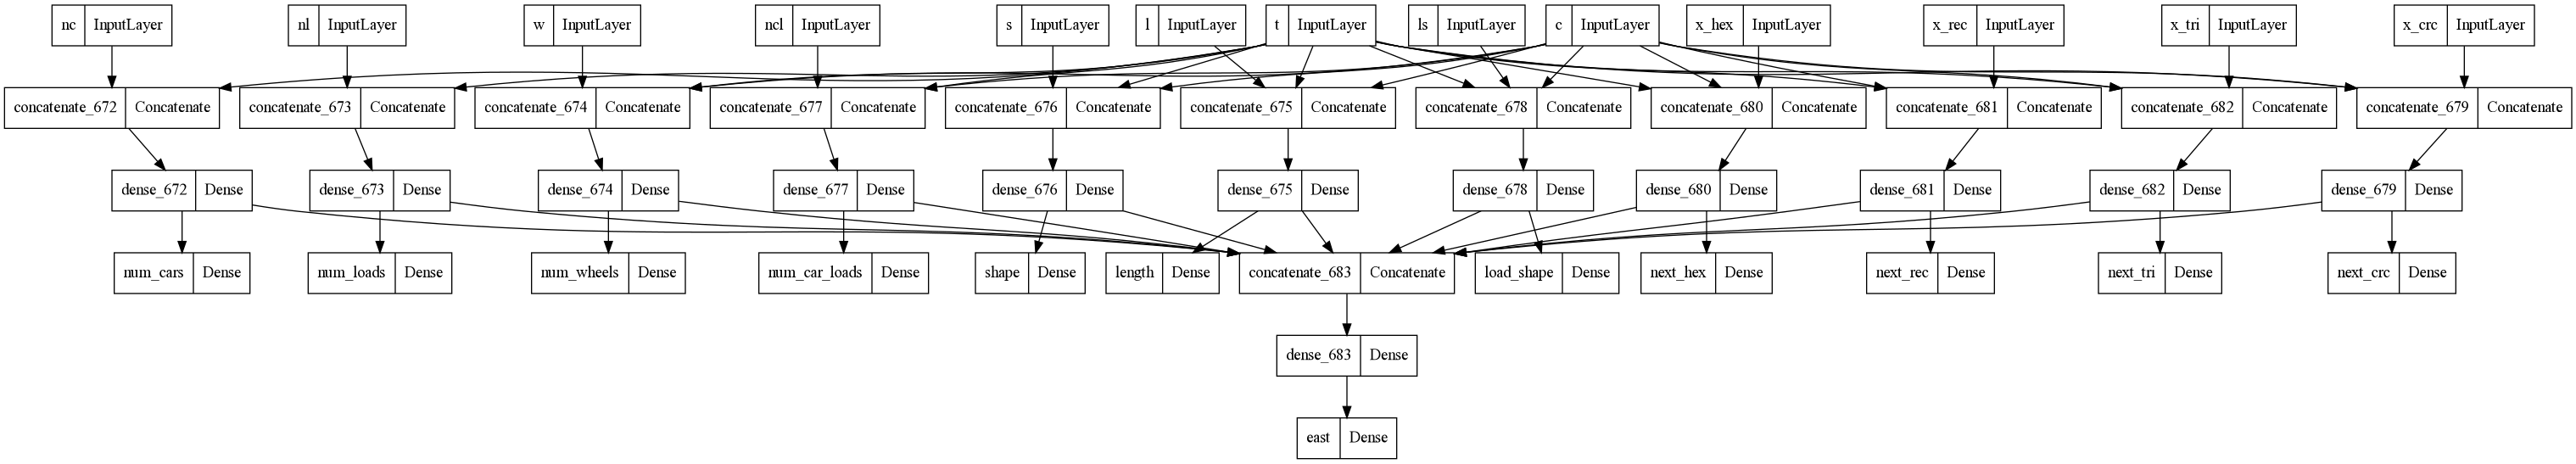

In [103]:
plot_model(metanet, show_shapes=False, show_layer_names=True)

### Data Augmentation

In [7]:
df = read_data()
cols = [
    [
        c
        for c in df.columns
        if not (str.isdigit(c[-1])) or (str.isdigit(c[-1]) and int(c[-1]) == n)
    ]
    for n in range(1, 5)
]

data = [df[col] for col in cols]
for c, df in enumerate(data):
    df.columns = [
        name if not str.isdigit(name[-1]) else name[:-1] for name in df.columns
    ]
    df["car"] = c + 1

data = pd.concat(data)
data.reset_index(level=0, inplace=True)
data["train"] = data.pop("index")
data.T[0]


Number_of_cars                 5
Number_of_different_loads      4
num_wheels                     2
length                         1
shape                          6
num_loads                      3
load_shape                     2
Rectangle_next_to_rectangle    0
Rectangle_next_to_triangle     1
Rectangle_next_to_hexagon      0
Rectangle_next_to_circle       0
Triangle_next_to_triangle      0
Triangle_next_to_hexagon       1
Triangle_next_to_circle        0
Hexagon_next_to_hexagon        0
Hexagon_next_to_circle         1
Circle_next_to_circle          0
Class_attribute                1
car                            1
train                          0
Name: 0, dtype: object

### Train

In [8]:
def sort_inputs(X):
    t = X["train"].T
    c = X["car"].T
    w = X["num_wheels"].T
    l = X["length"].T
    s = X["shape"].T
    nc = X["Number_of_cars"].T
    ls = X["load_shape"].T
    nl = X["Number_of_different_loads"].T
    ncl = X["num_loads"].T
    x_crc = np.sum(X[[col for col in X if col.endswith("circle")]], axis=1).T
    x_hex = np.sum(X[[col for col in X if col.endswith("hexagon")]], axis=1).T
    x_rec = np.sum(X[[col for col in X if col.endswith("rectangle")]], axis=1).T
    x_tri = np.sum(X[[col for col in X if col.endswith("triangle")]], axis=1).T

    return [t, c, w, l, s, nc, ls, nl, ncl, x_crc, x_hex, x_rec, x_tri]


def split(data, val_train):
    x_train = data.query(f"train != {val_train}")
    x_test = data.query(f"train == {val_train}")
    y_train = np.array(x_train.pop("Class_attribute"))
    y_test = np.array(x_test.pop("Class_attribute"))
    x_train = sort_inputs(x_train)
    x_test = sort_inputs(x_test)

    return x_train, x_test, y_train, y_test


In [116]:
hists = dict()
question_2_names = [
    "Train",
    "Output of flat network",
    "Desired output",
    "Class",
]
question_2 = {name: [] for name in question_2_names}

for validation_i in tqdm.tqdm(range(0, 10)):
    x_train, x_test, y_train, y_test = split(data, validation_i)
    metanet, east, rules = model_2()

    x_train = [np.asarray(x).astype(np.int) for x in x_train]
    y_train = np.asarray(y_train).astype(np.int)
    x_test = [np.asarray(x).astype(np.int) for x in x_test]
    y_test = np.asarray(y_test).astype(np.int)

    east.compile(
        loss=binary_crossentropy, optimizer=RAdam(), metrics=["mse", "binary_accuracy"]
    )
    hist = east.fit(
        x_train,
        y_train,
        validation_data=[x_test, y_test],
        epochs=1000,
        verbose=0,
    )
    hists[validation_i] = hist

    question_2["Train"].append(validation_i)
    question_2["Output of flat network"].append(east.predict(x_test)[0][0])
    question_2["Desired output"].append(y_test[0])
    question_2["Class"].append(str_att["Class_attribute"][int(y_test[0])])


  0%|                                                                            | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 122ms/step


 10%|██████▊                                                             | 1/10 [00:31<04:44, 31.58s/it]

1/1 [==============================] - 0s 150ms/step


 20%|█████████████▌                                                      | 2/10 [01:22<05:42, 42.77s/it]

1/1 [==============================] - 0s 158ms/step


 30%|████████████████████▍                                               | 3/10 [02:14<05:30, 47.27s/it]

1/1 [==============================] - 0s 151ms/step


 40%|███████████████████████████▏                                        | 4/10 [03:02<04:44, 47.36s/it]

1/1 [==============================] - 0s 179ms/step


 50%|██████████████████████████████████                                  | 5/10 [03:58<04:12, 50.50s/it]

1/1 [==============================] - 0s 253ms/step


 60%|████████████████████████████████████████▊                           | 6/10 [04:53<03:28, 52.21s/it]

1/1 [==============================] - 0s 229ms/step


 70%|███████████████████████████████████████████████▌                    | 7/10 [05:44<02:35, 51.78s/it]

1/1 [==============================] - 0s 110ms/step


 80%|██████████████████████████████████████████████████████▍             | 8/10 [06:30<01:39, 49.73s/it]

1/1 [==============================] - 0s 116ms/step


 90%|█████████████████████████████████████████████████████████████▏      | 9/10 [07:03<00:44, 44.60s/it]

1/1 [==============================] - 0s 151ms/step


100%|███████████████████████████████████████████████████████████████████| 10/10 [07:48<00:00, 46.89s/it]


### Results

In [9]:
for i, history in enumerate(hists.values()):
    plt.plot(history.history['mse'], c='tab:blue')
    plt.plot(history.history['val_mse'], c='tab:orange')

plt.title('model mean_squared_error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


NameError: name 'hists' is not defined

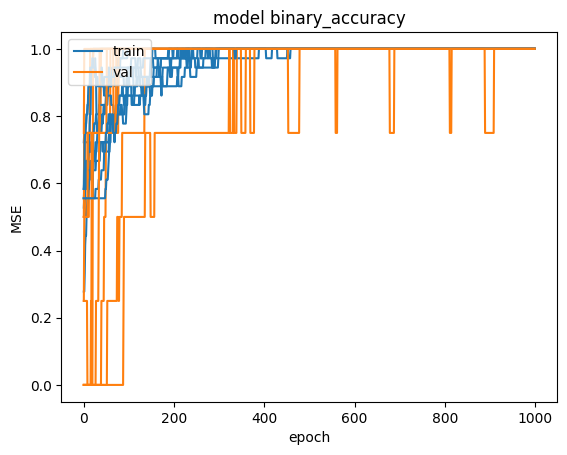

In [118]:
for i, history in enumerate(hists.values()):
    plt.plot(history.history['binary_accuracy'], c='tab:blue')
    plt.plot(history.history['val_binary_accuracy'], c='tab:orange')

plt.title('model binary_accuracy')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [119]:
t2 = pd.DataFrame.from_dict(question_2).round(2)
t2["Cars Accuracy"] = [hists[i].history["binary_accuracy"][-1] for i in range(0, 10)]
t2 = t2.reindex(
    columns=[
        "Train",
        "Cars Accuracy",
        "Output of flat network",
        "Desired output",
        "Class",
    ]
)
t2


,Train,Cars Accuracy,Output of flat network,Desired output,Class
0,0,1.0,1.00,1,east
1,1,1.0,0.73,1,east
2,2,1.0,0.97,1,east
3,3,1.0,1.00,1,east
4,4,1.0,0.62,1,east
5,5,1.0,0.02,0,west
6,6,1.0,0.00,0,west
7,7,1.0,0.27,0,west
8,8,1.0,0.27,0,west
9,9,1.0,0.00,0,west
